### matplotlib绘图基础

In [31]:
import matplotlib.pyplot as plt
from osgeo import gdal
import numpy as np


In [2]:
path_img = 'data/Section-5/s2_chenggong_mndwi_thre025.tif'


In [4]:
dset_mndwi = gdal.Open(path_img)
img_array = dset_mndwi.ReadAsArray()
img_array.shape


(1630, 1490)

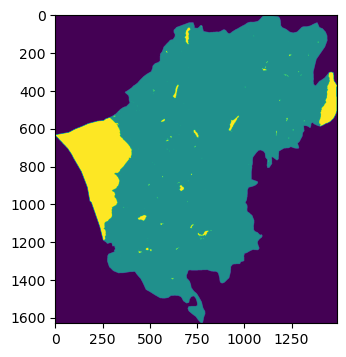

In [9]:
fig = plt.figure(figsize=(4, 4))
plt.imshow(img_array)


Text(0.5, 1.0, 'mndwi')

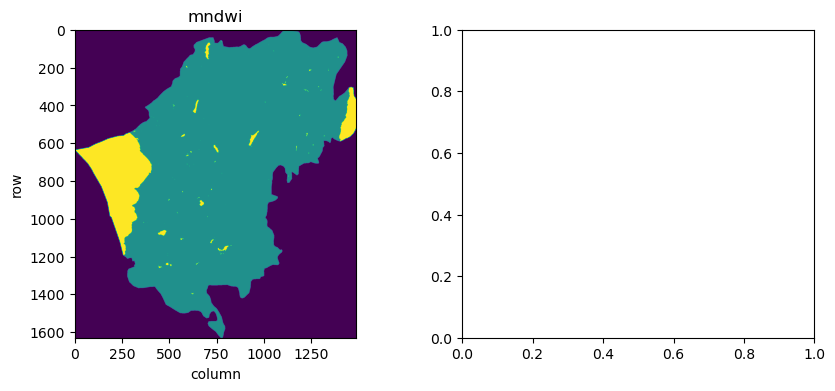

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))
ax[0].imshow(img_array)
ax[0].set_xlabel('column')
ax[0].set_ylabel('row')
ax[0].set_title('mndwi')


### 利用matplotlib实现遥感影像的显示

In [19]:
path_img = 'data/Section-2/s2_chenggong_20200411_6bands_20m.tif'


In [22]:
dset_img = gdal.Open(path_img)
img_array = dset_img.ReadAsArray()
img_array = img_array.transpose(1,2,0)
print(img_array.shape)


(1630, 1490, 6)


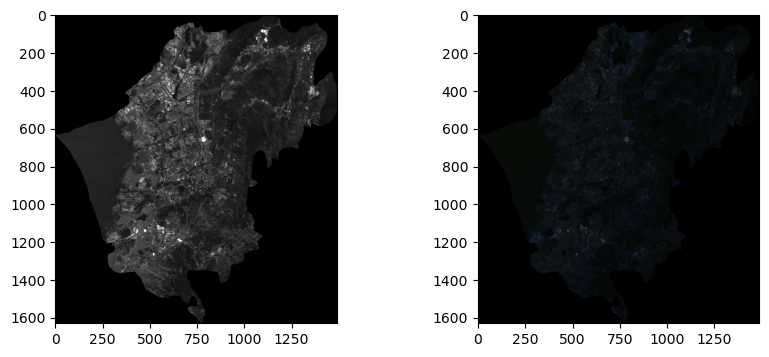

In [99]:
img_array = img_array/(np.max(img_array) - np.min(img_array))

fig, ax = plt.subplots(1, 2, figsize=(10,4))
ax[0].imshow(img_array[:, :, 0], cmap='gray', vmin=0, vmax=0.2)
ax[1].imshow(img_array[:, :, 0:3])



#### 栅格影像直方图拉伸

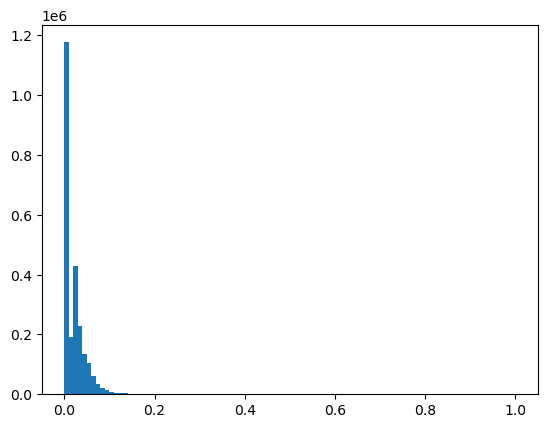

In [36]:
band_1 = img_array[:,:,0]
band_1_dn = band_1.flatten()
band_1_dn.shape
_ = plt.hist(band_1_dn, bins=100)


In [38]:
band_1_ = np.clip(band_1, 0, 0.2)
band_1_ = band_1_/(0.2-0)


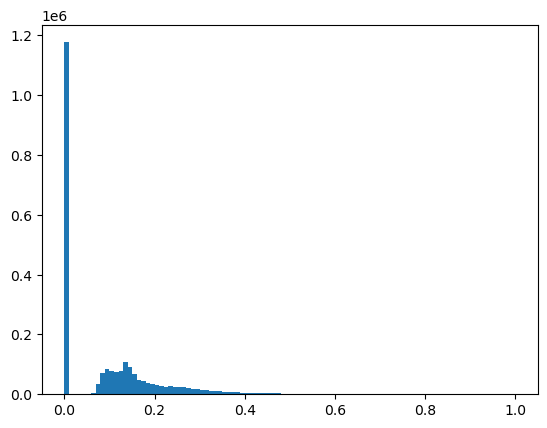

In [39]:
band_1_dn = band_1_.flatten()
band_1_dn.shape
_ = plt.hist(band_1_dn, bins=100)



In [102]:
dn_min = np.percentile(band_1, 2)
dn_max = np.percentile(band_1, 98)
print(dn_min, dn_max)
band_1_ = np.clip(band_1, dn_min, dn_max)
band_1_ = band_1_/(dn_max-dn_min)



0.0 0.08626126126126125


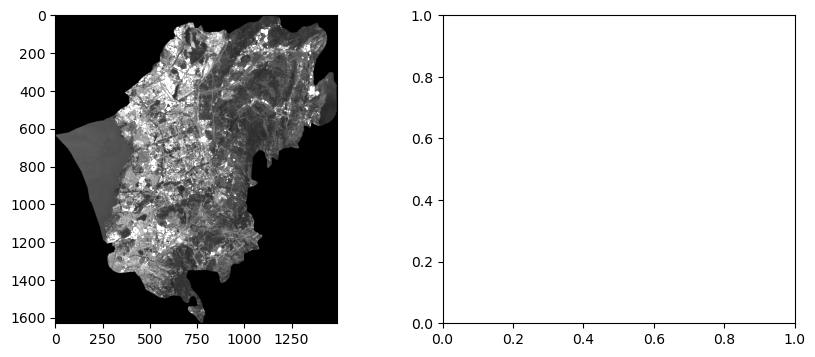

In [103]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))
ax[0].imshow(band_1, vmin=dn_min, vmax=dn_max, cmap='gray')
# ax[1].imshow(img_array[:, :, 0:3])


#### 彩色影像直方图拉伸

In [48]:
band_color = img_array[:, :, 0:3]
dn_min = np.percentile(band_color, 2)
dn_max = np.percentile(band_color, 98)
print(dn_min, dn_max)


0.0 0.11385135135135135


In [49]:
band_color_ = np.clip(band_color, dn_min, dn_max)
band_color_ = band_color_/(dn_max-dn_min)


In [60]:
geo_trans = dset_img.GetGeoTransform()
x_min, y_max= geo_trans[0], geo_trans[3]
x_max = x_min + geo_trans[1] * dset_img.RasterXSize
y_min = y_max + geo_trans[5]*dset_img.RasterYSize
extent = (x_min, x_max, y_min, y_max)



Text(0.5, 1.0, 'chenggong')

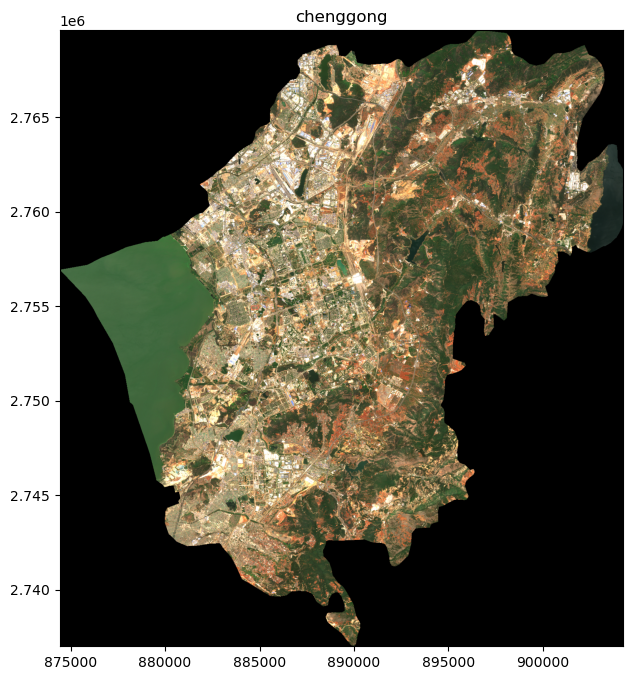

In [62]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
band_color__ = np.stack([band_color_[:,:,2], \
                         band_color_[:,:,1], band_color_[:,:,0]], axis=2)
ax.imshow(band_color__, vmin=dn_min, vmax=dn_max, extent=extent)
ax.set_title('chenggong')


### 利用matplotlib实现gis数据统计分析

In [63]:
from osgeo import ogr


In [64]:
path_vec = 'data/Section-4/kunming_districts_utm.shp'


In [71]:
ds = ogr.Open(path_vec)
layer = ds.GetLayer(0)
area_dict = {}
for i in range(layer.GetFeatureCount()):
    fea = layer.GetFeature(i)
    fea_name = fea.GetField('dt_name')
    fea_area = fea.geometry().Area()/1000000
    area_dict[fea_name] = fea_area
    print('region:', fea_name, ' ', end = ' ')
    print('Area: ', fea_area)


region: wuhua   Area:  377.9959786954036
region: panlong   Area:  864.2952967369314
region: guandu   Area:  638.33361729476
region: xishan   Area:  897.3967316211449
region: dongchuan   Area:  1866.1175875335907
region: chenggong   Area:  499.3639638876685
region: jinning   Area:  1338.5644973111487
region: fuming   Area:  994.6751193008305
region: yiliang   Area:  1914.0921754168523
region: shilin   Area:  1681.3428560105956
region: sonming   Area:  828.4756858595108
region: luquan   Area:  4227.345074248596
region: xundian   Area:  3598.342900037223
region: anning   Area:  1301.0062596518314


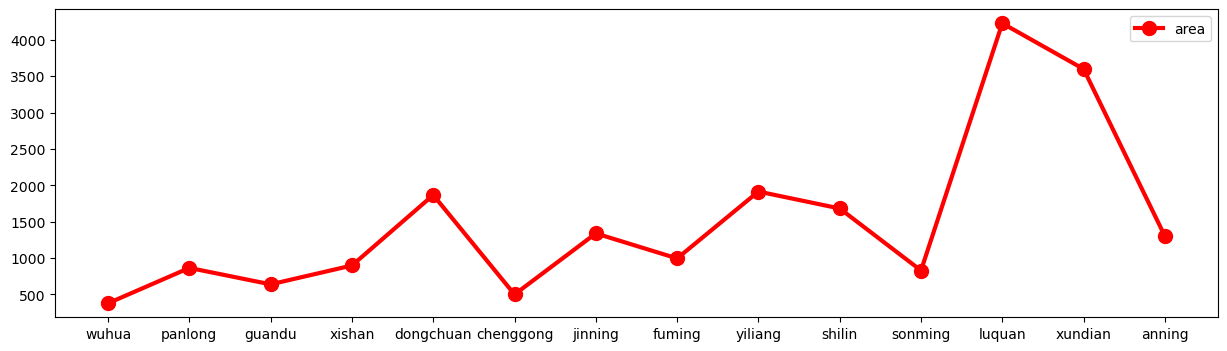

In [83]:
fig, ax = plt.subplots(1, 1, figsize=(15,4))
ax.plot(area_dict.keys(), area_dict.values(), '-ro', \
                        linewidth=3, markersize=10, label='area')
ax.legend()


(-1.0, 1.0)

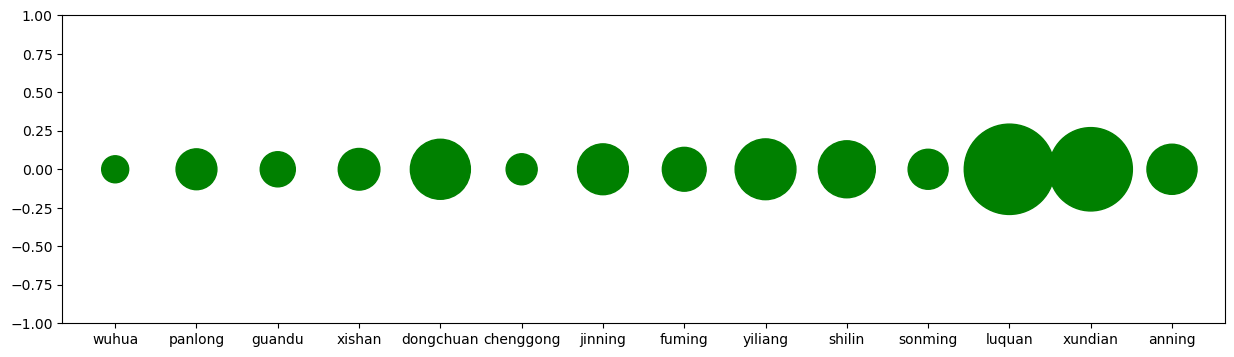

In [89]:
fig, ax = plt.subplots(1, 1, figsize=(15,4))
y = [0 for i in range(area_dict.__len__())]
ax.scatter(area_dict.keys(), y, s=list(area_dict.values()), color='g')
plt.ylim(-1,1)


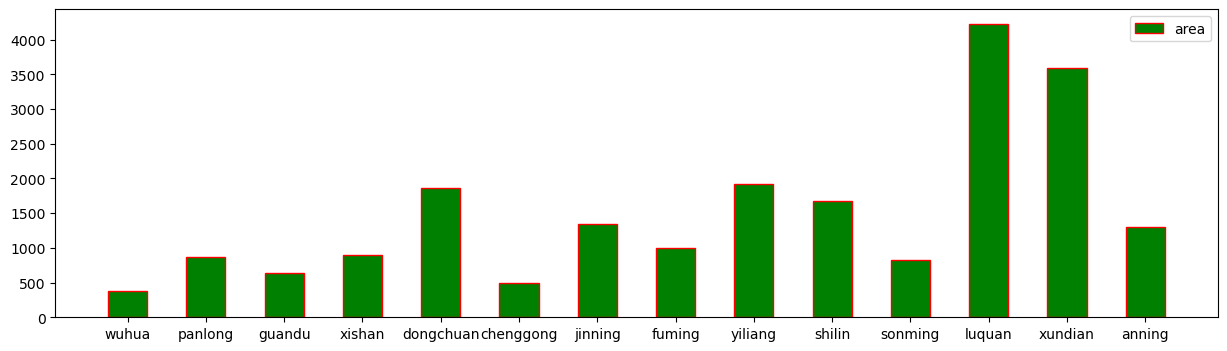

In [96]:
fig, ax = plt.subplots(1, 1, figsize=(15,4))
ax.bar(area_dict.keys(), area_dict.values(), width=0.5, fc='g', ec='r', label='area')
ax.legend()
